# Decoding Exchange Rate Trends – Euro vs. Dollar Visualization

## 1. Introducing the Dataset

In this project, we'll use a dataset that describes the Euro daily exchange rate against multiple currencies between `1999` and `2021`. The euro, symbolized by `€`, is the official currency in most **European Union** countries. 

To illustrate how the exchange rate works, consider if the exchange rate of the euro to the US dollar is `1.25`, you would receive `1.25` US dollars for each `1.0` euro. In other words, one euro holds more value than one US dollar at this exchange rate.

Daria Chemkaeva compiled the dataset and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). It's noteworthy that the data source is the **European Central Bank**. Additionally, the dataset we'll be working with receives regular updates. For our analysis, we'll use the version of January `2021`.

Our focus will be on the exchange rate between the euro and the American dollar. So let's start by reading in the dataset. Meanwhile, we can also start considering what data visualizations we might want to create using the data.

In [1]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

# Adjust the maximum number of columns displayed to show all columns
pd.set_option('display.max_columns', None)

# Read the dataset containing daily Euro exchange rates from 1999 to 2020
exchange_rates = pd.read_csv('Datasets/euro_daily_1999_2020.csv')

# Display the first 3 rows
exchange_rates.head(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,NaN,0.90128,NaN,9.4982,7.5690,359.62,17247.33,3.8981,89.7975,155.5,127.26,1337.90,NaN,NaN,NaN,24.4718,4.9359,10.2863,1.6883,58.947,4.5113,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,NaN,0.90190,NaN,9.5176,7.5660,357.79,17259.99,3.9027,90.0455,155.3,127.13,1342.29,NaN,NaN,NaN,24.2552,4.9570,10.3435,1.6907,59.043,4.4998,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,NaN,0.90635,NaN,9.5659,7.5595,357.86,17168.20,3.9289,90.2040,156.3,127.03,1339.30,NaN,NaN,NaN,24.3543,4.9482,10.3810,1.6916,59.296,4.5160,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123


In [2]:
# Display the last 3 rows
exchange_rates.tail(3)

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [3]:
# Display concise summary information
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

The dataset contains `5,699` rows and `41` columns, with `17` columns containing null values. Most of the columns are of the object (or string) data type. Each row describes the Euro daily exchange rate against multiple currencies, spanning from `1999-01-04` to `2021-01-08`.

## 2. Data Cleaning

Before we start creating data visualizations, it's important to do a bit of data cleaning. Below, we are going to:

* Rename the `[US dollar ]` and `Period\Unit:` columns to `US_dollar` and `Date`, respectively.
* Convert the `Date` column to a datetime data type.
* Sort the values by `Date` in ascending order.
* Reset the index while dropping the initial one.

In [4]:
# Rename columns to improve readability
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', r'Period\Unit:': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime data type
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])

# Sort the DataFrame by date in ascending order and reset the index
exchange_rates.sort_values(by='Date', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# Display the first few rows after cleaning
exchange_rates.head()

,Date,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


As mentioned earlier, our focus is on the exchange rate between the euro and the American dollar. Let's isolate the `Date` and `US_dollar` columns and assign them to a different variable.

In [5]:
# Create a new DataFrame containing only the 'Date' and 'US_dollar' columns
euro_to_dollar = exchange_rates[['Date', 'US_dollar']].copy()

# Count the occurrences of each unique value in 'US_dollar', and display the top 5 values
euro_to_dollar['US_dollar'].value_counts().head()

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
Name: count, dtype: int64

The `US_dollar` column contains the `-` symbol, which may be representing a missing value. Since rows containing this symbol account for a little over `1%`, we'll remove them and convert the remaining values to float.

In [6]:
# Remove rows where the 'US_dollar' column contains the '-' symbol
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Convert the 'US_dollar' column to float data type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

# Display summary information after data conversion
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


We're left with `5,637` entries, and each column has its appropriate data type. Thus, we have ample data for our next tasks.

## 3. The Rolling Mean

Now that we've finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate from `1999` to `2021`.

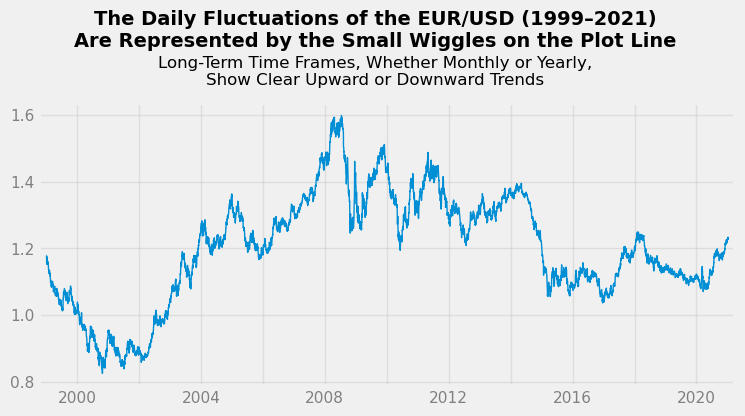

In [7]:
# Get the minimum and maximum date values with additional buffer
start_date = euro_to_dollar['Date'].min() - dt.timedelta(weeks=12)
end_date = euro_to_dollar['Date'].max() + dt.timedelta(weeks=12)

# Set the plot style and figure size
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 3.5))

# Plot the euro-dollar exchange rate data
plt.plot(euro_to_dollar['Date'], euro_to_dollar['US_dollar'], linewidth=1)

# Add a main title and subtitle
plt.suptitle('The Daily Fluctuations of the EUR/USD (1999–2021)\n\
Are Represented by the Small Wiggles on the Plot Line',
             ha="center", weight='bold', size=14, x=0.5, y=1.145)
plt.figtext(s='Long-Term Time Frames, Whether Monthly or Yearly,\n\
Show Clear Upward or Downward Trends',
            ha="center", x=0.5, y=0.93, size=12)

# Customize x-axis limits, and ticks and gridlines for both axes
plt.xlim(left=start_date, right=end_date)
plt.xticks(ticks=['2000', '2002', '2004', '2006', '2008', '2010', 
                  '2012', '2014', '2016', '2018', '2020'],
           labels=[2000, '', 2004, '', 2008, '', 2012, '', 2016, '', 2020], size=11, c='grey')
plt.yticks(size=11, c='grey')
plt.grid(alpha=0.5)

# Display the plot
plt.show()

When observing the shape of the plot line, we notice many small wiggles instead of a smooth line. These wiggles visually represent the daily variations in the exchange rate, as it fluctuates up and down on a daily basis. However, the graph reveals clear upward or downward trends in long-term time frames.

Depending on our purpose, we may want to hide the daily variation on our graph to focus only on the long-term trends. We can achieve this by using the **rolling mean** (or **moving average**). Additionally, we refer to the number of days used to calculate the rolling mean as the **rolling window** (or **moving window**). For example, if the rolling window equals `3`, we calculate the rolling mean using the values of the current day and the previous two days. Thus, for the third day, the moving average would be the mean of the values from the third day and the previous two days.

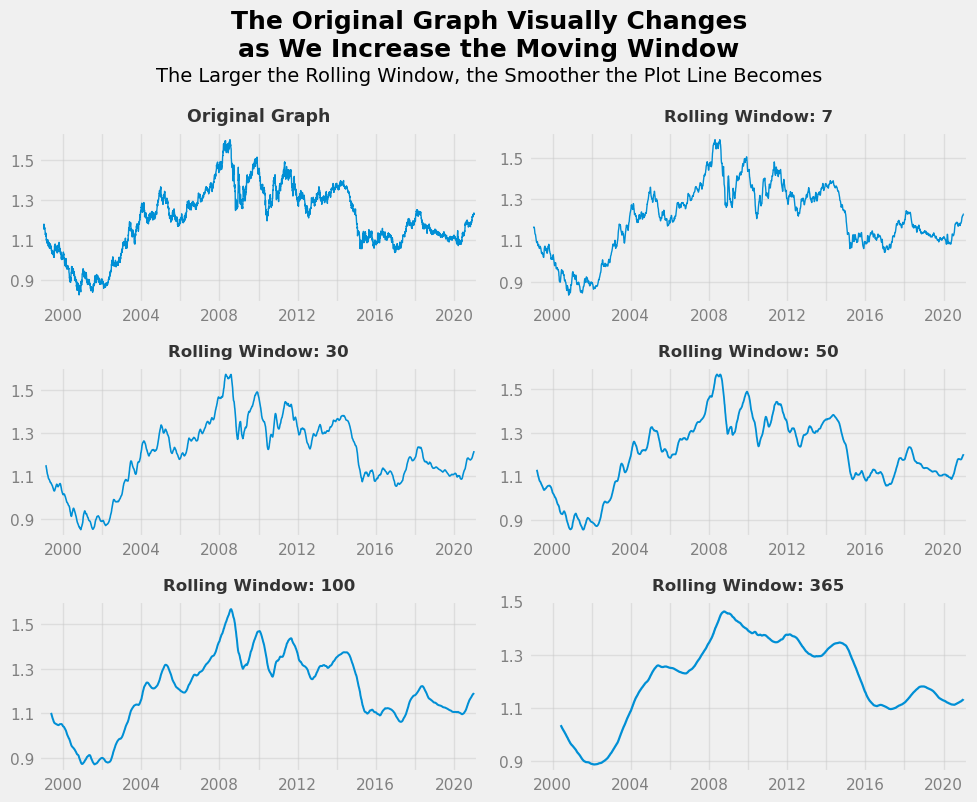

In [8]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Add a main title and subtitle
plt.suptitle('The Original Graph Visually Changes\n\
as We Increase the Moving Window',
             ha="center", weight='bold', size=18, x=0.5, y=1.005)
plt.figtext(s='The Larger the Rolling Window, the Smoother the Plot Line Becomes',
            ha="center", x=0.5, y=0.915, size=14)

# Plot the original graph
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Date'], euro_to_dollar['US_dollar'], linewidth=1)
plt.title('Original Graph', c='#333333', weight='bold', size=12.5, pad=8)
plt.yticks(ticks=[0.9, 1.1, 1.3, 1.5], size=11, c='grey')
plt.xticks(ticks=['2000', '2002', '2004', '2006', '2008', '2010', 
                  '2012', '2014', '2016', '2018', '2020'],
           labels=[2000, '', 2004, '', 2008, '', 2012, '', 2016, '', 2020], size=11, c='grey')
plt.xlim(left=start_date, right=end_date)
plt.grid(alpha=0.5)

# Plot graphs with different rolling windows
rolling_windows = [7, 30, 50, 100, 365]
indices = range(2, 7)
linewidth = 1

for i, rw in zip(indices, rolling_windows):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Date'], euro_to_dollar['US_dollar'].rolling(rw).mean(), lw=linewidth)
    plt.title("Rolling Window: " + str(rw), c='#333333', weight='bold', size=12, pad=8)
    plt.xlim(left=start_date, right=end_date)
    plt.xticks(ticks=['2000', '2002', '2004', '2006', '2008', '2010',
                      '2012', '2014', '2016', '2018', '2020'],
               labels=[2000, '', 2004, '', 2008, '', 2012, '', 2016, '', 2020], size=11, c='grey')
    plt.yticks(ticks=[0.9, 1.1, 1.3, 1.5], size=11, c='grey')
    plt.grid(alpha=0.5)
    linewidth += 0.15

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Notice the rolling window can take various values. Some common options include `7` days (one week), `30` days (one month), `50` or `100` days, or `365` days (one year). Above, we observe how our initial line plot changes visually as we increase the moving window. As the rolling window size increases, the plot line becomes smoother. This enhances the data-ink ratio, which can be useful if we want our audience to focus solely on long-term trends.

Next, let's calculate the rolling means for the `US_dollar` column using a couple of moving windows.

In [9]:
# Calculate the rolling mean using a window of 7 and 30 days
euro_to_dollar['Rolling_mean_7'] = euro_to_dollar['US_dollar'].rolling(7).mean()
euro_to_dollar['Rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()

# Display a subset of rows from index 5 to 9, and from index 28 to 32
display(euro_to_dollar.iloc[5:10])
display(euro_to_dollar.iloc[28:33])

,Date,US_dollar,Rolling_mean_7,Rolling_mean_30
5,1999-01-11,1.1569,NaN,NaN
6,1999-01-12,1.1520,1.167171,NaN
7,1999-01-13,1.1744,1.166529,NaN
8,1999-01-14,1.1653,1.164571,NaN
9,1999-01-15,1.1626,1.162900,NaN


,Date,US_dollar,Rolling_mean_7,Rolling_mean_30
28,1999-02-11,1.1312,1.130357,NaN
29,1999-02-12,1.1244,1.129029,1.150667
30,1999-02-15,1.1238,1.128671,1.148830
31,1999-02-16,1.1176,1.127014,1.146783
32,1999-02-17,1.1253,1.127114,1.145150


From the output above, we can conclude that:
- The moving average is missing for the first `6` days in the `Rolling_mean_7` column because we calculated the rolling mean using the values of the current day and the previous `6` days.
- The moving average is missing for the first `29` days in the `Rolling_mean_30` column because we calculated the rolling mean using the values of the current day and the previous `29` days.

## 4. Coming up with an Idea

Finally, we're going to spend some time brainstorming ideas for the graphs we may want to build. To tell a compelling story, we need to arrange our data into a series of events that demonstrate change. Here are a few story ideas for our data:

- We illustrate how the euro-dollar rate changed during the coronavirus pandemic using a line plot. We can display the `2020` data, as well as the `2016–2019` data as a baseline.
- We illustrate how the euro-dollar rate changed during the `2007–2008` financial crisis using a line plot. We can include the data for `2006` and `2009` for comparison.
- We illustrate how the euro-dollar rate changed under three US presidents using a line plot – **George W. Bush** `(2001–2009)`, **Barack Obama** `(2009–2017)`, and **Donald Trump** `(2017–2021)`.

## 5. Storytelling Data Visualization: The Financial Crisis

Let's illustrate how the euro-dollar exchange rate changed during the `2007–2008` financial crisis, and include the data for both `2006` and `2009` for comparison. To do this, we need to select data for the period between `2006` and `2009` from the `euro_to_dollar` DataFrame. 

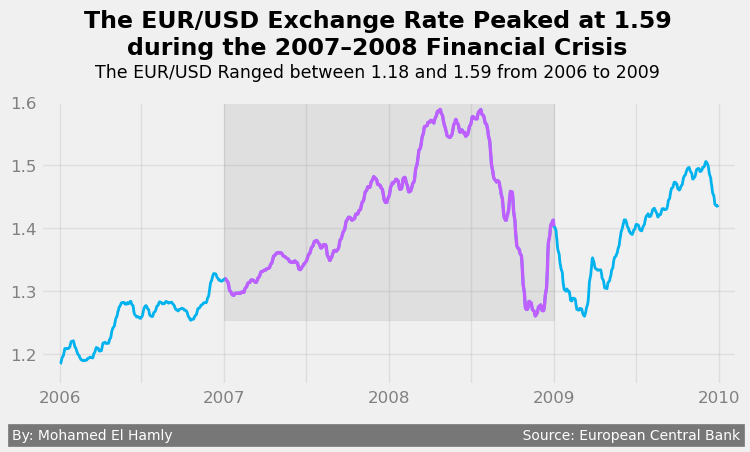

In [10]:
# Select data for the period between 2006 and 2009
financial_crisis = euro_to_dollar.copy()[euro_to_dollar['Date'].dt.year.between(2006, 2009)]

# Select data for the 2007-2008 financial crisis period
financial_crisis_07_08 = euro_to_dollar.copy()[(euro_to_dollar['Date'].dt.year >= 2007) 
                                             & (euro_to_dollar['Date'].dt.year <= 2008)]

# Get the minimum and maximum date values with additional buffer
start_date = financial_crisis['Date'].min() - dt.timedelta(weeks=6)
end_date = financial_crisis['Date'].max() + dt.timedelta(weeks=6)


# Set the figure size
plt.figure(figsize=(8, 3.5))

# Plot the financial crisis data, and add a vertical box to highlight the crisis period
plt.plot(financial_crisis['Date'], financial_crisis['Rolling_mean_7'], c='#00B2EE', linewidth=2)
plt.plot(financial_crisis_07_08['Date'], financial_crisis_07_08['Rolling_mean_7'], 
         c='#BF5FFF', linewidth=2.4)
plt.axvspan('2007-01', '2009-01', ymin=0.23, color='grey', alpha=0.15)

# Add a main title and subtitle
plt.suptitle('The EUR/USD Exchange Rate Peaked at 1.59\n\
during the 2007–2008 Financial Crisis',
             ha="center", weight='bold', size=17, x=0.5, y=1.145)
plt.figtext(s='The EUR/USD Ranged between 1.18 and 1.59 from 2006 to 2009',
            ha="center", x=0.5, y=0.95, size=12.5)

# Customize x-axis limits, and ticks and gridlines for both axes
plt.xlim(left=start_date, right=end_date)
plt.ylim(1.15, 1.6)
plt.xticks(ticks=['2006-01', '2006-07', '2007-01', '2007-07', 
                  '2008-01', '2008-07', '2009-01', '2009-07', '2010-01'],
           labels=[2006, '', 2007, '', 2008, '', 2009, '', 2010], size=12, c='grey')
plt.yticks(size=12, c='grey')
plt.grid(alpha=0.5)

# Add a signature text at the bottom
plt.text(13850, 1.065, s="By: Mohamed El Hamly" + ' '*80 + "Source: European Central Bank",
         ha='center', color='white', backgroundcolor='#777777', fontsize=10)

# Display the plot
plt.show()

The `EUR/USD` ranged between `1.18` and `1.59` from `2006` to `2009`. The euro strengthened against the US dollar from early `2006` to around `mid-2008`. The exchange rate peaked in July `2008` at around `1.59` USD per euro. After that, the euro weakened against the dollar and witnessed a sharp decline, reaching `1.26` USD per euro in November `2008`.

There are a few reasons why this might have happened. Investors tend to flock to the dollar as a safe-haven asset during times of economic uncertainty such as the financial crisis. This could explain some of the weakening of the euro after its peak.

Another factor that may have influenced the `EUR/USD` is the difference in interest rates between the USA and the eurozone. During the financial crisis, the **US Federal Reserve** lowered interest rates more aggressively than the **European Central Bank**. This could have made dollar-denominated assets more attractive to investors and put downward pressure on the euro.

## 6. Storytelling Data Visualization:  The Three US Presidencies

Let's illustrate how the euro-dollar rate changed under three US presidents using a line plot – **George W. Bush** `(2001–2009)`, **Barack Obama** `(2009–2017)`, and **Donald Trump** `(2017–2021)`. 

First, we need to select data for the period between `2001` and `2021` from the `euro_to_dollar` DataFrame, then split this new data into three datasets, each representing one US presidency.

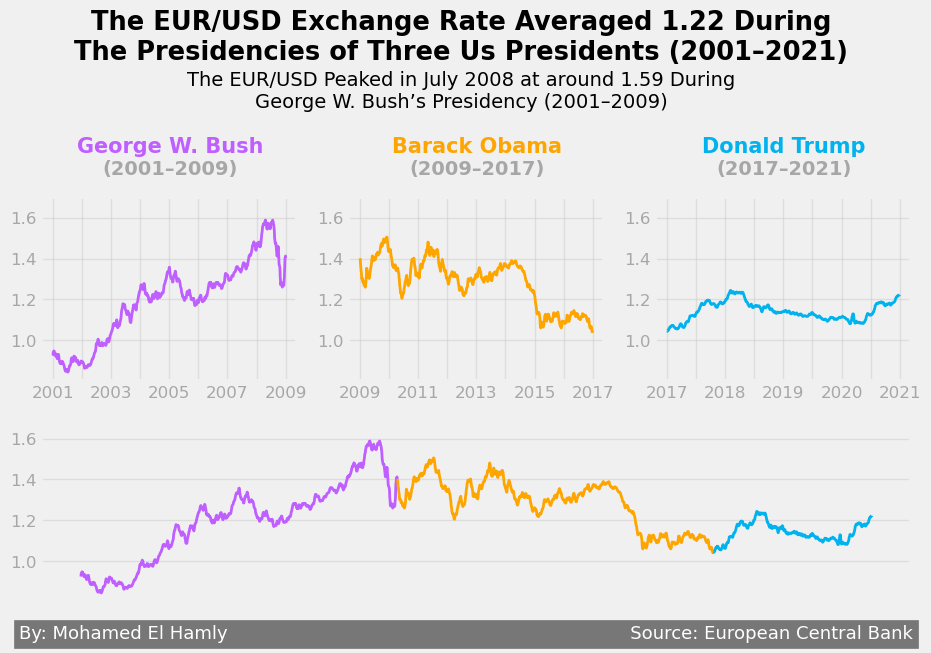

In [11]:
# Select data for the period between 2001 and 2020
three_presidents = euro_to_dollar.copy()[euro_to_dollar['Date'].dt.year.between(2001, 2020)]

# Select data for each US president
bush = three_presidents.copy()[three_presidents['Date'].dt.year <= 2008]
obama = three_presidents.copy()[three_presidents['Date'].dt.year.between(2009, 2016)]
trump = three_presidents.copy()[three_presidents['Date'].dt.year >= 2017]


# Set the figure size and create subplots
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]

# Add a main title and subtitle
plt.suptitle('The EUR/USD Exchange Rate Averaged 1.22 During\n\
The Presidencies of Three Us Presidents (2001–2021)',
             ha="center", weight='bold', size=18.5, x=0.5, y=1.255)
plt.figtext(s="The EUR/USD Peaked in July 2008 at around 1.59 During\n\
George W. Bush’s Presidency (2001–2009)",
            ha="center", x=0.5, y=1.06, size=14)

# Customize the y-axis and gridlines for each subplot
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], size=12, alpha=0.3)
    ax.grid(alpha=0.5)


# Plot data, customize the x-axis, and add text annotations for George W. Bush's presidency
ax1.plot(bush['Date'], bush['Rolling_mean_7'], color='#BF5FFF', lw=2)
ax1.set_xticks(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'])
ax1.set_xticklabels(['2001', '', '2003', '', '2005', '', '2007', '', '2009'], size=12, alpha=0.3)
ax1.text(12790, 1.92, s='George W. Bush', ha='center', weight='bold', color='#BF5FFF', fontsize=15)
ax1.text(12790, 1.81, s='(2001–2009)', ha='center', weight='bold', alpha=0.3)

# Plot data, customize the x-axis, and add text annotations for Barack Obama's presidency
ax2.plot(obama['Date'], obama['Rolling_mean_7'], color='#ffa500', lw=2)
ax2.set_xticks(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
ax2.set_xticklabels(['2009', '', '2011', '', '2013', '', '2015', '', '2017'], size=12, alpha=0.3)
ax2.text(15710, 1.92, s='Barack Obama', ha='center', weight='bold', color='#ffa500', fontsize=15)
ax2.text(15710, 1.81, s='(2009–2017)', ha='center', weight='bold', alpha=0.3)

# Plot data, customize the x-axis, and add text annotations for Donald Trump's presidency
ax3.plot(trump['Date'], trump['Rolling_mean_7'], color='#00B2EE', lw=2)
ax3.set_xticks(['2017-01', '2017-07', '2018-01', '2018-07',
                '2019-01', '2019-07', '2020-01', '2020-07', '2021-01'])
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], size=12, alpha=0.3)
ax3.text(17900, 1.92, s='Donald Trump', ha='center', weight='bold', color='#00B2EE', fontsize=15)
ax3.text(17900, 1.81, s='(2017–2021)', ha='center', weight='bold', alpha=0.3)

# Plot the rolling mean for each US president and add a signature text
ax4.plot(bush['Date'], bush['Rolling_mean_7'], color='#BF5FFF', lw=2)
ax4.plot(obama['Date'], obama['Rolling_mean_7'], color='#ffa500', lw=2)
ax4.plot(trump['Date'], trump['Rolling_mean_7'], color='#00B2EE', lw=2)
ax4.text(10750, 0.62, s="By: Mohamed El Hamly" + ' '*70 + "Source: European Central Bank",
        color = 'white', backgroundcolor = '#777777', size=13)
ax4.grid(alpha=0.5)
ax4.set_xticks([])


# Display the plot
plt.show()

The `EUR/USD` exchange rate fluctuated throughout the period represented in the plot, showing a long-term uptrend followed by a long-term downtrend before moving sideway.

Overall, the euro strengthened against the dollar and peaked in July `2008` at around `1.59` during the presidency of George W. Bush (`2001–2009`), weakened during the presidency of Barack Obama (`2009–2017`), and then remained relatively constant during the presidency of Donald Trump (`2017–2021`).

There are a number of factors that can affect currency exchange rates, and the relative importance of these factors can vary over time. Some examples are:

- `Interest rates` – investors are often attracted to currencies with higher interest rates. For instance, if interest rates are higher in the United States than in the eurozone, investors may buy dollars and sell euros, leading to a decrease in the value of the euro.
- `Inflation` – if the rate at which the prices of goods and services increase is higher in the eurozone than in the United States, it could make euro-denominated goods and services more expensive, potentially leading to a decrease in the value of the euro.
- `Economic growth` – investors are typically attracted to currencies from countries with robust economic growth. If the USA economy is growing faster than the eurozone's, investors may buy dollars and sell euros.
- `Government debt` – high levels of government debt can make investors nervous about a country's ability to repay its debts. As a result, investors may sell that country's currency.

## 7. Conclusion

In this project, we used a dataset sourced from the **European Central Bank**, which describes the daily Euro exchange rate against multiple currencies from `1999` to `2021`. Our focus was solely on the exchange rate between the euro and the American dollar. Before creating our data visualizations, we began by exploring and cleaning the data.

After visualizing the evolution of the euro-dollar exchange rate from `1999` to `2021`, we noticed small wiggles that represent the daily variations and fluctuations in the exchange rate. However, the graph reveals clear upward or downward trends in long-term time frames. Furthermore, we learned that we can smooth out these wiggles by using the rolling mean. Increasing the rolling window size results in a smoother plot line. This enhances the data-ink ratio, which can be useful if we want our audience to focus solely on long-term trends.

We developed three story ideas to arrange our data into a series of events that demonstrate change, providing possible graphs we could build. We illustrated how the euro-dollar exchange rate changed during the `2007–2008` financial crisis and under three US presidents. Here are some key takeaway points:

- The `EUR/USD` exchange rate ranged between `1.18` and `1.59` from `2006` to `2009`, peaking in July `2008` at around `1.59` USD per euro. Subsequently, the euro weakened against the dollar and experienced a sharp decline, reaching `1.26` USD per euro in November `2008`.
- The euro strengthened against the dollar during the presidency of George W. Bush (`2001–2009`), weakened during the presidency of Barack Obama (`2009–2017`), and remained relatively constant during the presidency of Donald Trump (`2017–2021`).
- There are several factors that can affect currency exchange rates, including `interest rates`, `inflation`, `investor sentiment`, `economic growth`, and `government debt`.